#### Introduction

SVM is a supervised learning algorithm used for classification and regression.It is one of the most poweful machine learning algorithm.

A support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection


This model uses datasets that contains various features of mobile. The end goal is to be able to seperate those features based on the importance

####  Importing all the important libraries

In [2]:
import pandas as pd # pandas for reading and manuplating data
import numpy as np # numpy for arithmatic operations
import seaborn as sns # sesaborn is also used for visualizations
import matplotlib.pyplot as plt # matplotlib for visualization
from matplotlib.colors import ListedColormap #ListedColormap is used to color a section of the map
import sklearn #sklearn for building the algorithm


Most of the libraries such as pandas, numpy, matplotlib are pre installed in anacondas jupyter notebook. However, some libraries such as keras would need to be installed by typing !pip install(name of the library)

#### Reading the data

Pandas read function is one of the ways to read/import the dataset. Other ways of reading/immporting the dataset is through links or by using the inbuild dataset provided by python

In [3]:
# reading the data using pandas dataframe
# r is used before the file's path bcz python was having trouble in finding the path

df_train=pd.read_csv(r'E:\LYIT\Eoghan Furey ML\Assignment 2 Practical\6-SVM\train.csv')

df_train.head()
# .head() or .tail() will show you a part of the entire dataset
# If we do not mention how many variables you want to see, the python will by default show only 5 variables.

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df_test=pd.read_csv(r'E:\LYIT\Eoghan Furey ML\Assignment 2 Practical\6-SVM\test.csv')
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


####  Checking for missing values

Most of the dataset has missing values/ NAN values, thus it is always better to check the missing values. If the missing values for a particular variable is more than 50% then that variable should be dropped.

In [5]:
#checking for missing values for training df

df_train.isnull().sum()


# .isnull function checks for the null values
# .sum displays all the null values


#It is important to check missing values because if there are a lot of missing values it can cause biaseness in model
#Following are some of the methods used by me to handle missing values:

# 1) Dropping : if the number of missing value in a particular column is more than 50% then it is advised to drop that column 
#.dropna() function can accomplish that task

#2)Replacing : Replacing missing values with the values of mean, median or mode is another way of hanling missing values.
#fillna() function of pandas is used to replace the missing values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
#checking msissing values for test df

df_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

####  Checking the description and correlation of the dataset
This step is only carried out to understand the dataset. Commonly used method for understanding the dataset is to find out the shape,discription, info,correlation of the data set, it is done so that we know how many rows, columns, correlation, min, maximum values are there.

In [7]:
df_train['price_range'].describe() #it will tell us whats the mean, standard deviation and the maximum values along with the total counts



count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

In [12]:
#finding out what are the unique values given in price range

df_train['price_range'].unique()


array([1, 2, 3, 0], dtype=int64)

It seems like 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

It is important to check the correlation between dependent and independent variables because that tells us about the strength of the relationship between dependent variables and independent variables.

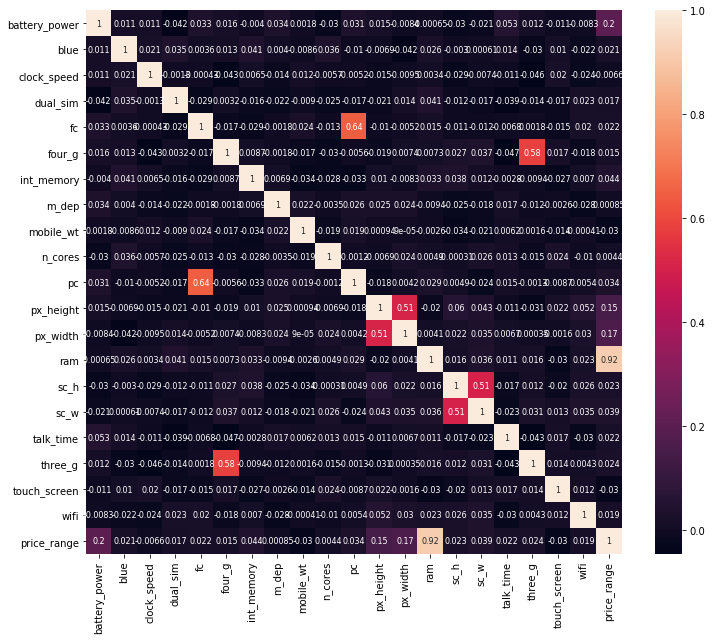

In [13]:
#checking the coorelation with heat map

correlation=df_train.corr()  # putting the correlation of the data into a variable called correlation

figsize=plt.subplots(figsize=(12,10))
# if figsize is not mentioned, python we assume the default size and if there are a lot of variables then it might look messy

sns.heatmap(correlation,annot=True,annot_kws={'size':8}) #annot=True is used to label the values and annot_kws will give the values a size and will
#map look more presentable

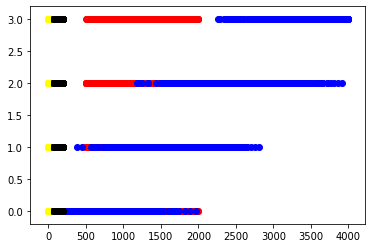

In [14]:
# using scatterplot to check the values range in each category

plt.scatter(y=df_train['price_range'],x=df_train['battery_power'],color='red')
plt.scatter(y=df_train['price_range'],x=df_train['clock_speed'],color='green')
plt.scatter(y=df_train['price_range'],x=df_train['ram'],color='blue')
plt.scatter(y=df_train['price_range'],x=df_train['touch_screen'],color='yellow')
plt.scatter(y=df_train['price_range'],x=df_train['mobile_wt'],color='black')

#this concludes that different category has different set of value range

####   Building a  SVM model

It is immportant to split the dataset into training and testing so that model can learn from training dataset and perform on testing dataset. The test size for the dataset varies from industry to industry. However, a standard of 70-30 is taken in general, where 70 % of the data set is used for training and 30 % of the data is used for testing

In [15]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split # from model_selection importing train_test_split

y=df_train['price_range'] # assigning the values of price_range variables into y variable
x=df_train.drop(['price_range'],axis=1) # except the values of price_range all the other values would be into x variable
x=x

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.20) #keeping test size to 20% 

In [19]:
from sklearn.svm import SVC
svc = SVC()

In [20]:
for this_C in [1,3,5,10,40,60,80,100]:
    clf = SVC(kernel='linear',C=this_C).fit(X_train,Y_train)
    scoretrain = clf.score(X_train,Y_train)
    scoretest  = clf.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.988750 , Test Score: 0.972500 

Linear SVM value of C:3, training score :0.988125 , Test Score: 0.975000 

Linear SVM value of C:5, training score :0.990000 , Test Score: 0.975000 

Linear SVM value of C:10, training score :0.989375 , Test Score: 0.972500 

Linear SVM value of C:40, training score :0.988125 , Test Score: 0.972500 

Linear SVM value of C:60, training score :0.988125 , Test Score: 0.972500 

Linear SVM value of C:80, training score :0.988125 , Test Score: 0.972500 

Linear SVM value of C:100, training score :0.988750 , Test Score: 0.972500 



Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.

In [21]:
# cross validating the scores

from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut
clf1 = SVC(kernel='linear',C=20).fit(X_train,Y_train)
scores = cross_val_score(clf1,X_train,Y_train,cv=5)
strat_scores = cross_val_score(clf1,X_train,Y_train,cv=StratifiedKFold(5,random_state=10,shuffle=True))
#Loo = LeaveOneOut()
#Loo_scores = cross_val_score(clf1,X_train,Y_train,cv=Loo)
print("The Cross Validation Score :"+str(scores))
print("The Average Cross Validation Score :"+str(scores.mean()))
print("The Stratified Cross Validation Score :"+str(strat_scores))
print("The Average Stratified Cross Validation Score :"+str(strat_scores.mean()))
#print("The LeaveOneOut Cross Validation Score :"+str(Loo_scores))
#print("The Average LeaveOneOut Cross Validation Score :"+str(Loo_scores.mean()))

The Cross Validation Score :[0.97819315 0.96261682 0.978125   0.96551724 0.95924765]
The Average Cross Validation Score :0.9687399718258968
The Stratified Cross Validation Score :[0.97507788 0.96573209 0.975      0.96865204 0.96865204]
The Average Stratified Cross Validation Score :0.9706228088164923


In [45]:
from sklearn.dummy import DummyClassifier

for strat in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy_maj = DummyClassifier(strategy=strat).fit(X_train,Y_train)
    print("Train Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_train,Y_train)))
    print("Test Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_test,Y_test)))

Train Stratergy :stratified 
 Score :0.25
Test Stratergy :stratified 
 Score :0.25
Train Stratergy :most_frequent 
 Score :0.26
Test Stratergy :most_frequent 
 Score :0.23
Train Stratergy :prior 
 Score :0.26
Test Stratergy :prior 
 Score :0.23
Train Stratergy :uniform 
 Score :0.24
Test Stratergy :uniform 
 Score :0.26


The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset.

In [49]:
# plotting the decision boundries for the data 
#converting the data to array for plotting.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = np.array(df_train.iloc[:,[0,13]])
y = np.array(df_train['price_range'])
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))
X = scaler.fit_transform(X)

Shape of X:(2000, 2)
Shape of y:(2000,)


In [50]:
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

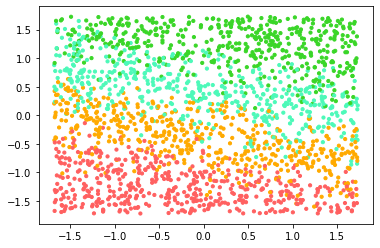

In [51]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

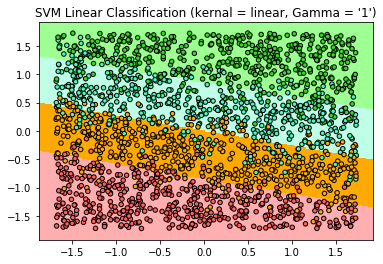

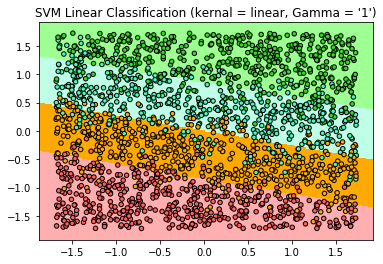

In [52]:
h = .02  # step size in the mesh
C_param = 1 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf1 = SVC(kernel='linear',C=C_param)
    clf1.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-.20, X[:, 0].max()+.20
    y_min, y_max = X[:, 1].min()-.20, X[:, 1].max()+.20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (C_param))

plt.show()

#### Conclusion:
With around 97 % accuracy score the SVM model was sucessfully able to seperate all the features.